<a href="https://colab.research.google.com/github/shiivam-saini/Google_stock_price_prediction/blob/main/Googlestockprice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import os
os.environ["KAGGLE_USERNAME"]="shiivamsaini"
os.environ["KAGGLE_KEY"]="ce3bf1e7c806d81ca8756ca8e8ad0d06"

In [4]:
from google.colab import files
uploaded=files.upload()

Saving training.csv to training (1).csv


In [5]:
train_data=pd.read_csv("/content/training.csv")

In [6]:
train_data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2016-02-16,34.648998,34.900002,34.252499,34.549999,34.549999,50400000
1,2016-02-17,34.904499,35.487499,34.569000,35.419998,35.419998,49852000
2,2016-02-18,35.500000,35.617500,34.801498,34.867500,34.867500,37664000
3,2016-02-19,34.751499,35.154049,34.702499,35.045502,35.045502,31786000
4,2016-02-22,35.372501,35.661999,35.125500,35.323002,35.323002,38996000


In [7]:
train_data.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
1315,2021-05-06,117.531998,119.135498,117.116898,119.067497,119.067497,20618000
1316,2021-05-07,120.000000,120.820503,119.500000,119.934502,119.934502,23272000
1317,2021-05-10,118.744499,118.900002,116.736504,117.083000,117.083000,26006000
1318,2021-05-11,114.593002,116.099998,114.150002,115.438004,115.438004,32110000
1319,2021-05-12,113.085503,114.268501,111.502502,111.954002,111.954002,34934000


In [8]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1320 entries, 0 to 1319
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1320 non-null   object 
 1   Open       1320 non-null   float64
 2   High       1320 non-null   float64
 3   Low        1320 non-null   float64
 4   Close      1320 non-null   float64
 5   Adj Close  1320 non-null   float64
 6   Volume     1320 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 72.3+ KB


In [9]:
train_set=train_data.iloc[:,1:2].values

In [10]:
train_set.shape

(1320, 1)

In [11]:
#feature scaling to normalise the data
from sklearn.preprocessing import MinMaxScaler
ms=MinMaxScaler(feature_range=(0,1))
train_scaled=ms.fit_transform(train_set)

In [12]:
train_scaled

array([[0.01263704],
       [0.01557496],
       [0.02242244],
       ...,
       [0.9796243 ],
       [0.93188757],
       [0.91455332]])

In [13]:
#creating a data structure with 60 timestamps and 1 output
x_train=[]
y_train=[]
for i in range(60,1320):
  x_train.append(train_scaled[i-60:i,0])
  y_train.append(train_scaled[i,0])

x_train,y_train=np.array(x_train),np.array(y_train)



In [14]:
x_train

array([[0.01263704, 0.01557496, 0.02242244, ..., 0.01574169, 0.02357228,
        0.02630327],
       [0.01557496, 0.02242244, 0.01381566, ..., 0.02357228, 0.02630327,
        0.03013233],
       [0.02242244, 0.01381566, 0.02095637, ..., 0.02630327, 0.03013233,
        0.02648148],
       ...,
       [0.82129901, 0.81597507, 0.82408744, ..., 0.97590447, 0.96568214,
        0.99406091],
       [0.81597507, 0.82408744, 0.82158071, ..., 0.96568214, 0.99406091,
        0.9796243 ],
       [0.82408744, 0.82158071, 0.82755428, ..., 0.99406091, 0.9796243 ,
        0.93188757]])

In [15]:
x_train.shape

(1260, 60)

In [16]:
x_train=x_train.reshape(1260,60,1)

In [17]:
x_train.shape

(1260, 60, 1)

In [18]:
#Initializing RNN
model=tf.keras.models.Sequential()
model.add(tf.keras.layers.LSTM(units=60,activation='relu',return_sequences=True,input_shape=(60,1)))
model.add(tf.keras.layers.Dropout(0.2))

model.add(tf.keras.layers.LSTM(units=60,activation='relu',return_sequences=True))
model.add(tf.keras.layers.Dropout(0.2))

model.add(tf.keras.layers.LSTM(units=80,activation='relu',return_sequences=True))
model.add(tf.keras.layers.Dropout(0.2))

model.add(tf.keras.layers.LSTM(units=120,activation='relu'))
model.add(tf.keras.layers.Dropout(0.2))



In [19]:
#output Layer
model.add(tf.keras.layers.Dense(units=1))


In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 60, 60)            14880     
                                                                 
 dropout (Dropout)           (None, 60, 60)            0         
                                                                 
 lstm_1 (LSTM)               (None, 60, 60)            29040     
                                                                 
 dropout_1 (Dropout)         (None, 60, 60)            0         
                                                                 
 lstm_2 (LSTM)               (None, 60, 80)            45120     
                                                                 
 dropout_2 (Dropout)         (None, 60, 80)            0         
                                                                 
 lstm_3 (LSTM)               (None, 120)               9

In [21]:
#loss function
model.compile(optimizer='adam',loss='mean_squared_error')

In [22]:
model.fit(x_train,y_train,batch_size=32,epochs=100)

Epoch 1/100
40/40 [==============================] - 13s 171ms/step - loss: 0.0304
Epoch 2/100
40/40 [==============================] - 8s 203ms/step - loss: 0.0036
Epoch 3/100
40/40 [==============================] - 7s 171ms/step - loss: 0.0027
Epoch 4/100
40/40 [==============================] - 8s 204ms/step - loss: 0.0033
Epoch 5/100
40/40 [==============================] - 8s 204ms/step - loss: 0.0024
Epoch 6/100
40/40 [==============================] - 7s 172ms/step - loss: 0.0025
Epoch 7/100
40/40 [==============================] - 8s 204ms/step - loss: 0.0033
Epoch 8/100
40/40 [==============================] - 7s 173ms/step - loss: 0.0022
Epoch 9/100
40/40 [==============================] - 8s 202ms/step - loss: 0.0025
Epoch 10/100
40/40 [==============================] - 8s 203ms/step - loss: 0.0021
Epoch 11/100
40/40 [==============================] - 7s 172ms/step - loss: 0.0023
Epoch 12/100
40/40 [==============================] - 8s 205ms/step - loss: 0.0020
Epoch 13/100

In [ ]:
test_data=pd.read_csv('/content/test_set.csv')

In [ ]:
test_data.shape

(504, 7)

In [ ]:
real_stock_price=test_data.iloc[:,1:2].values

In [ ]:
real_stock_price.shape

(504, 1)

In [ ]:
#getting predicted stock prices
dataset_total=pd.concat((train_data['Open'],test_data['Open']),axis=0)

#stock prices of previous 60 days
inputs=dataset_total[len(dataset_total)-len(test_data)-60:].values

inputs=inputs.reshape(-1,1)

inputs=ms.transform(inputs)

#Creating a Testset
x_test=[]
for i in range(60,564):
  x_test.append(inputs[i-60:i,0])

x_test=np.array(x_test)
x_test=np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))

pred_stock_price=model.predict(x_test)
pred_stock_price=ms.inverse_transform(pred_stock_price)





16/16 [==============================] - 1s 56ms/step


In [ ]:
print(pred_stock_price[6]),print(real_stock_price[6])

[114.697395]
[116.402]


(None, None)

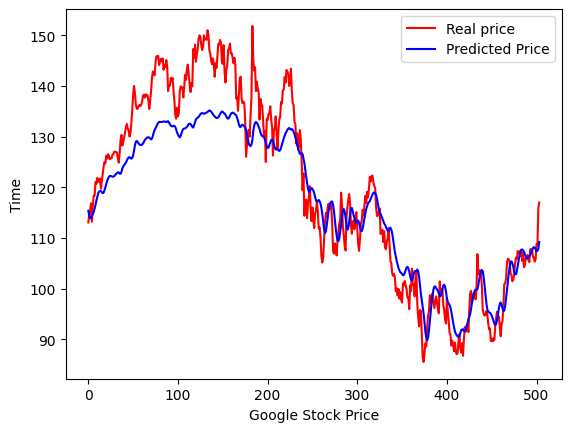

In [ ]:
plt.plot(real_stock_price,color='red',label='Real price')
plt.plot(pred_stock_price,color='blue',label='Predicted Price')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()